<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
len(df)

23699

In [5]:
# общая  информация о таблице:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Пропуски в столбцах

`ceiling_height          14504 
floors_total            23613
living_area             21796 
is_apartment            2775
kitchen_area            21421
balcony                 12180
locality_name           23650 
airports_nearest        18157 
cityCenters_nearest     18180 
parks_around3000        18181 
parks_nearest           8079 
ponds_around3000        18181
ponds_nearest           9110 
days_exposition         20518`

- Заменим пропуски в столбце `balcony` на 0, возможно в этих домах действительно нет балконов. 
- Стобец `ceiling_height` min высота 1 м и max высота 100 м, похожа на ошибку , проверить этот столбец. Пропуски в данном столбце заменим медианным значением по группировке этажности дома.Также в столбцах `living_area,kitchen_area` пропущенные значения заполниммедианным значением горуппируя по кол-ву комнат.
- Пропущенные знаечения в столбцах `floors_total,locality_name`  удалим.
- Пропущенные значения в столбцах `is_apartment,airports_nearest, cityCenters_nearest,parks_around3000  parks_nearest,ponds_around3000 ,ponds_nearest` оставим без изменений, так как они нам не нужны при работе с данными.
- Пропущенные знаечения в столбцах `days_exposition` оставим без изменений, так как возможно объявление еще актуально и поэтому пропущенное значение в таблице.


## Предобработка данных

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# подсчёт явных дубликатов
print("Количество дубликатов: {}".format(df.duplicated().sum()))

Количество дубликатов: 0


In [9]:
#заполним пропуски в 'balcony' значением 0:
df['balcony']=df['balcony'].fillna(0)

In [10]:
df['balcony'].isna().sum()

0

In [11]:
#удалим пропущенные значения в столбцах  'floors_total','locality_name':
df.dropna(subset=['floors_total','locality_name'], inplace=True)
df['floors_total'].isna().sum()

0

In [12]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.105026,0.116969,0.099759,-0.001865,0.009822,0.105551,0.032781,-0.028201,-0.024670,0.106896,0.046879,-0.002701,-0.048103,0.020955,-0.006017,-0.011352,-0.003995,-0.027340
last_price,0.105026,1.000000,0.653621,0.363191,0.085401,-0.006745,0.566380,0.026842,-0.025084,-0.008801,0.520362,0.008568,-0.026216,-0.206353,0.151492,-0.016529,0.160735,-0.085836,0.080858
total_area,0.116969,0.653621,1.000000,0.758735,0.095432,-0.075252,0.939771,-0.024368,-0.072000,-0.034942,0.609248,0.010243,-0.030466,-0.231181,0.165890,-0.021266,0.163757,-0.100140,0.149974
rooms,0.099759,0.363191,0.758735,1.000000,0.054378,-0.227913,0.846117,-0.151341,-0.146068,-0.087735,0.270342,-0.015542,-0.060975,-0.184096,0.137806,-0.053719,0.093600,-0.060119,0.126969
ceiling_height,-0.001865,0.085401,0.095432,0.054378,1.000000,-0.028586,0.090573,-0.011685,0.001686,0.042785,0.087723,0.031370,-0.023798,-0.091484,0.065992,-0.019307,0.078297,-0.059438,0.019027
floors_total,0.009822,-0.006745,-0.075252,-0.227913,-0.028586,1.000000,-0.168940,0.678010,0.070224,0.050844,0.164803,0.173408,0.108547,0.018743,-0.252490,0.097608,-0.122799,0.040003,-0.052410
living_area,0.105551,0.566380,0.939771,0.846117,0.090573,-0.168940,1.000000,-0.096676,-0.056307,-0.033756,0.428909,-0.014786,-0.057428,-0.230576,0.184878,-0.050694,0.149785,-0.082830,0.142135
floor,0.032781,0.026842,-0.024368,-0.151341,-0.011685,0.678010,-0.096676,1.000000,0.035946,0.036184,0.136545,0.171507,0.073129,0.008336,-0.163601,0.072988,-0.076240,0.026467,-0.039042
studio,-0.028201,-0.025084,-0.072000,-0.146068,0.001686,0.070224,-0.056307,0.035946,1.000000,-0.004216,NaN,0.030019,-0.021707,-0.006864,-0.030857,0.006923,0.000813,0.001838,-0.021572
open_plan,-0.024670,-0.008801,-0.034942,-0.087735,0.042785,0.050844,-0.033756,0.036184,-0.004216,1.000000,NaN,0.032541,-0.013638,-0.004222,-0.010118,0.010692,0.008516,-0.003395,-0.024146


In [13]:
df['total_area'].sort_values()

19904     12.0
17961     13.0
19546     13.0
19807     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23565, dtype: float64

In [14]:
#разобьем кол-во комнат по категориям , напишем функцию:
def rooms_cat(df):
    if df['rooms']==1:
        return 'однокомнатные'
    elif df['rooms']==2:
        return 'двухкомнатные'
    elif (df['rooms'] == df['rooms']) & (df['rooms'] != 1)& (df['rooms'] != 2):
        return 'многокомнатные'
df['rooms_cat'] = df.apply(rooms_cat, axis = 1)
df['rooms_cat'].value_counts()

однокомнатные     8004
двухкомнатные     7897
многокомнатные    7664
Name: rooms_cat, dtype: int64

In [15]:
df.groupby(['rooms_cat'])['living_area'].median()

rooms_cat
двухкомнатные     30.5
многокомнатные    47.0
однокомнатные     17.6
Name: living_area, dtype: float64

In [16]:
#заполним пропуски в 'living_area' медианным значением с группировкой по типу rooms_cat:
df['living_area']=df['living_area'] \
    .fillna(df.groupby(['rooms_cat',])['living_area'] \
    .transform('median'))
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
rooms_cat                   0
dtype: int64

In [17]:
#заполним пропуски в 'kitchen_area' медианным значением с группировкой по типу rooms_cat:
df['kitchen_area']=df['kitchen_area'] \
    .fillna(df.groupby(['rooms_cat',])['kitchen_area'] \
    .transform('median'))
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
rooms_cat                   0
dtype: int64

In [18]:
df.groupby(['floors_total', 'floor'])['ceiling_height'].median()

floors_total  floor
1.0           1        2.80
2.0           1        2.70
              2        2.72
3.0           1        2.75
              2        2.80
                       ... 
36.0          28        NaN
              29       2.70
37.0          5        1.75
52.0          18       2.65
60.0          4        2.88
Name: ceiling_height, Length: 417, dtype: float64

In [19]:
#заполним пропуски в 'ceiling_height' медианным значением с группировкой по типу floors_total, 
#есть вероятность, что высота потолков в среднем идентичны в зданиях одной этажности:
df['ceiling_height']=df['ceiling_height'] \
    .fillna(df.groupby(['floors_total'])['ceiling_height'] \
    .transform('median'))
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
rooms_cat                   0
dtype: int64

Одно значение в столбце ceiling_height не заполнилось медианным значением, посмотрим на это объявление.

In [20]:
df.query('ceiling_height=="NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,rooms_cat
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0,многокомнатные


In [21]:
#С помощью query выведем срез , согласно условию и найдем медиану всоты потолоков в этих квартирах:
df.query('total_area==101' and 'last_price==9000000')['ceiling_height'].median()

2.8

Через fillna одно пропущенное значение в ceiling_height заполним данной цифрой 2.8

In [22]:
df['ceiling_height']=df['ceiling_height'].fillna(2.8)
df['ceiling_height'].isna().sum()

0

In [23]:
#df.loc[(df["ceiling_height"] >= 20) & (df["is_apartment"] == False), "ceiling_height"] /= 10

In [24]:
#Заменим тип данных столбца first_day_exposition в datetime:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_a

## Расчёты и добавление результатов в таблицу

In [26]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,rooms_cat
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,многокомнатные
1,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,однокомнатные
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,двухкомнатные
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,47.0,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,многокомнатные
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,двухкомнатные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,многокомнатные
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5.0,38.0,4,NaN,...,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,многокомнатные
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3.0,29.7,1,NaN,...,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,двухкомнатные
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12,NaN,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,двухкомнатные


In [27]:
#цена за 1 кв.м:
df['price_sq_metr']=df['last_price']/df['total_area']

In [28]:
#добавим день недели, месяц и год публикации объявления:
df['first_day_weekday']=df['first_day_exposition'].dt.weekday 
df['first_day_month']=df['first_day_exposition'].dt.month 
df['first_day_year']=df['first_day_exposition'].dt.year 

In [29]:
#напишем функцию, чтобы добавить этаж квартиры; варианты — первый, последний, другой:
def floor_definition(df):
    if df['floor'] == 1:
        return 'первый'
    elif (df['floors_total'] == df['floor']) & (df['floor'] != 1):
        return 'последний'
    else:
        return 'другой'
df['floor_cat'] = df.apply(floor_definition, axis = 1)
df['floor_cat'].value_counts()

другой       17326
последний     3330
первый        2909
Name: floor_cat, dtype: int64

In [30]:
#Добавим столбцы соотношение жилой к общей площади, а также отношение площади кухни к общей:
df['living_ratio']=df['living_area']/df['total_area']
df['kitchen_ratio']=df['kitchen_area']/df['total_area']

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построем гистограмму и диаграмму размаха для каждого параметра.total_area, price_sq_metr,rooms,ceiling_height

Построем гистограммы для столбцов total_area, last_price,rooms,ceiling_height.Цену возьмем за 1 кв.м.

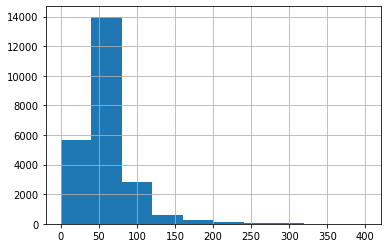

In [31]:
df['total_area'].hist(range=(0,400), bins=10);


count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

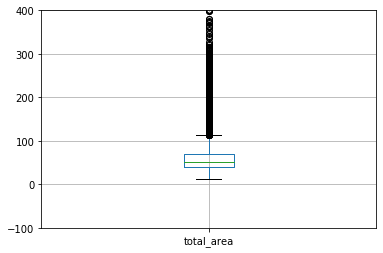

In [32]:
df.boxplot('total_area') 
plt.ylim(-100, 400)
df['total_area'].describe()

Большая часть значений лежит в диапазоне до 100 кв.м, миниальная площадь 12 кв.м, скорее всего это студии.Выбросов много.Максимальная площадь квартиры 900 кв.м.,что судя по всему не норма.



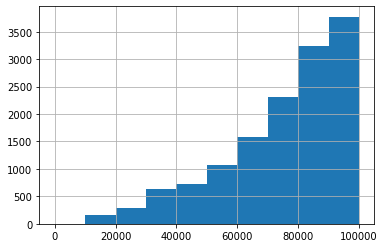

In [33]:
df['price_sq_metr'].hist(range=(0,100000), bins=10);


count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.118349e+02
25%      7.656613e+04
50%      9.500000e+04
75%      1.142132e+05
max      1.907500e+06
Name: price_sq_metr, dtype: float64

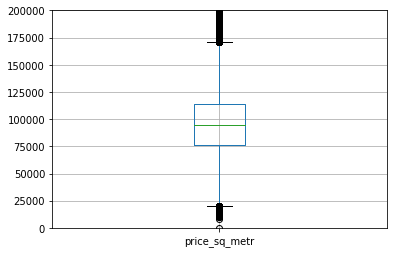

In [34]:
df.boxplot('price_sq_metr') 
plt.ylim(0,200000)
df['price_sq_metr'].describe()

Миниальная цена за 1 квм -11 тыс, что  подозрительно мало и выглядит аномально.Выбросов очень много. В среднем за 1кв.м 99 тыс.руб., что тоже не есть хорошо. Есть квартиры , которые портят всю статистику.

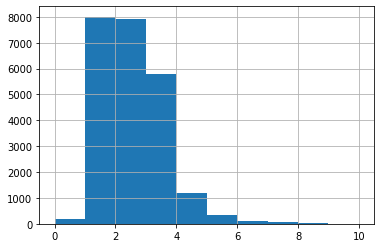

In [35]:
df['rooms'].hist(range=(0,10),bins=10);


count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

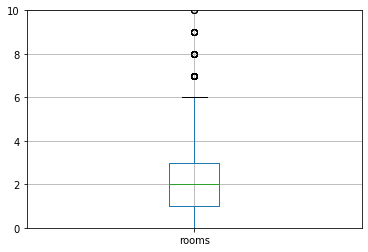

In [36]:
df.boxplot('rooms') 
plt.ylim(0, 10)
df['rooms'].describe()

Большинство значений лежат в диапазоне до 4 комнат. В среднем имеем 2-х комнатные квартиры. миниальное число комнат 0, максимальное 19.


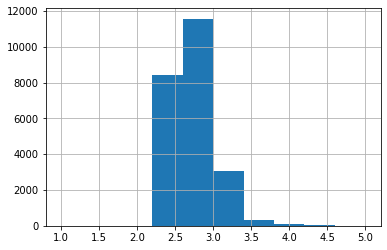

In [37]:
df['ceiling_height'].hist(range=(1,5),bins=10);

count    23565.000000
mean         2.735744
std          0.996999
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

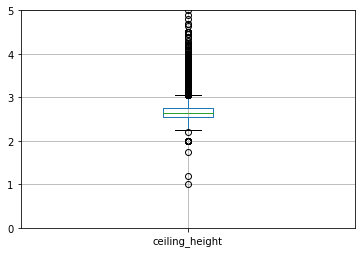

In [38]:
df.boxplot('ceiling_height') 
plt.ylim(0, 5)
df['ceiling_height'].describe()

Судя по графику , выбросов очень много.Высота потолков 1 м и максимальная высота 100 м, что выглядит аномально. Средняя высота равняется 2,75 м.



Изучим время продажи квартиры. Построем гистограмму и диаграмму размаха. 

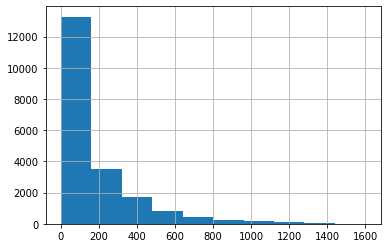

In [39]:
df['days_exposition'].hist(range=(1,1600),bins=10);
plt.show()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

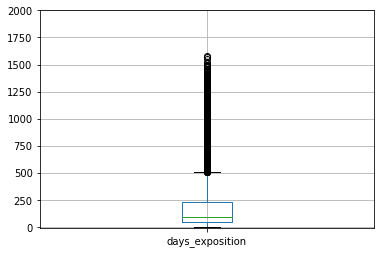

In [40]:
df.boxplot('days_exposition') 
plt.ylim(-10, 2000)
df['days_exposition'].describe()

Большинство значений лежат в диапазоне до 300 дней. В среднем квартиры продаются за 3,5 мес(100 дней).Быстрее всего можно продать квартиры за 1 день, а максимальное время продаж 4 года.

Напишем функцию , которая будет выдавать на выходе интервалы "усов" диаграммы для каждого параметра.Тем самым это поможет определить нормальный интервал значений, а все , что лежит за пределами данных интервалов и будет считаться выбивающимися значениями.

In [41]:
def normal_interval (column):
    describe = df[column].describe()
    irq=describe[6]-describe[4] #межквартальный размах
    left_value=describe[4]-1.5*irq
    right_value=describe[6]+1.5*irq
    if left_value<describe[3]:
         left_value=describe[3]
    if right_value>describe[-1]:
        right_value=describe[-1]
    return (left_value,right_value)
        

In [42]:
normal_interval('total_area')

(12.0, 114.25)

In [43]:
#Добавим новые столбцы в таблицу, согласно условию:
df['too_large_area'] = df['total_area'] > 114 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,rooms_cat,price_sq_metr,first_day_weekday,first_day_month,first_day_year,floor_cat,living_ratio,kitchen_ratio,too_large_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,многокомнатные,120370.370370,3,3,2019,другой,0.472222,0.231481,False
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,NaN,...,81.0,однокомнатные,82920.792079,1,12,2018,первый,0.460396,0.272277,False
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,NaN,...,558.0,двухкомнатные,92785.714286,3,8,2015,другой,0.612500,0.148214,False
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,47.0,9,NaN,...,424.0,многокомнатные,408176.100629,4,7,2015,другой,0.295597,0.062893,True
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,121.0,двухкомнатные,100000.000000,1,6,2018,другой,0.320000,0.410000,False


In [44]:
df['too_large_area'].value_counts()

False    22320
True      1245
Name: too_large_area, dtype: int64

In [45]:
normal_interval('price_sq_metr')

(20095.516270743254, 170683.80698882308)

In [46]:
#Добавим новые столбцы в таблицу, согласно условию:
df['too_expensive_price'] = df['price_sq_metr'] >= 170683
df['too_chip_price'] = df['price_sq_metr'] <= 20095
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_sq_metr,first_day_weekday,first_day_month,first_day_year,floor_cat,living_ratio,kitchen_ratio,too_large_area,too_expensive_price,too_chip_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,120370.370370,3,3,2019,другой,0.472222,0.231481,False,False,False
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,NaN,...,82920.792079,1,12,2018,первый,0.460396,0.272277,False,False,False
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,NaN,...,92785.714286,3,8,2015,другой,0.612500,0.148214,False,False,False
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,47.0,9,NaN,...,408176.100629,4,7,2015,другой,0.295597,0.062893,True,True,False
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,100000.000000,1,6,2018,другой,0.320000,0.410000,False,False,False


In [47]:
normal_interval('rooms')

(0.0, 6.0)

In [48]:
#Добавим новые столбцы в таблицу, согласно условию:
df['too_many_rooms'] = df['rooms'] >= 6
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,first_day_weekday,first_day_month,first_day_year,floor_cat,living_ratio,kitchen_ratio,too_large_area,too_expensive_price,too_chip_price,too_many_rooms
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,3,3,2019,другой,0.472222,0.231481,False,False,False,False
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,NaN,...,1,12,2018,первый,0.460396,0.272277,False,False,False,False
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,NaN,...,3,8,2015,другой,0.612500,0.148214,False,False,False,False
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,47.0,9,NaN,...,4,7,2015,другой,0.295597,0.062893,True,True,False,False
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1,6,2018,другой,0.320000,0.410000,False,False,False,False


In [49]:
normal_interval('ceiling_height')

(2.2499999999999996, 3.0500000000000003)

In [50]:
#Добавим новые столбцы в таблицу, согласно условию:
df['too_high_ceiling_height'] = df['ceiling_height'] > 3.05
df['too_low_ceiling_height'] = df['ceiling_height'] < 2.25
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,first_day_year,floor_cat,living_ratio,kitchen_ratio,too_large_area,too_expensive_price,too_chip_price,too_many_rooms,too_high_ceiling_height,too_low_ceiling_height
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2019,другой,0.472222,0.231481,False,False,False,False,False,False
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,NaN,...,2018,первый,0.460396,0.272277,False,False,False,False,False,False
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,NaN,...,2015,другой,0.612500,0.148214,False,False,False,False,False,False
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,47.0,9,NaN,...,2015,другой,0.295597,0.062893,True,True,False,False,False,False
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2018,другой,0.320000,0.410000,False,False,False,False,False,False


In [51]:
normal_interval('days_exposition')

(1.0, 510.0)

In [52]:
#Добавим новые столбцы в таблицу, согласно условию:
df['too_slow'] = df['days_exposition'] >= 510
df['too_fast'] = df['days_exposition'] < 1
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_ratio,kitchen_ratio,too_large_area,too_expensive_price,too_chip_price,too_many_rooms,too_high_ceiling_height,too_low_ceiling_height,too_slow,too_fast
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0.472222,0.231481,False,False,False,False,False,False,False,False
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,NaN,...,0.460396,0.272277,False,False,False,False,False,False,False,False
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,NaN,...,0.612500,0.148214,False,False,False,False,False,False,True,False
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,47.0,9,NaN,...,0.295597,0.062893,True,True,False,False,False,False,False,False
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0.320000,0.410000,False,False,False,False,False,False,False,False


Удалим редкие и выбивающиеся значения

In [53]:
df.drop(df[df['too_large_area'] == True].index, inplace=True)
df.drop(df[df['too_expensive_price'] == True].index, inplace=True)
df.drop(df[df['too_chip_price'] == True].index, inplace=True)
df.drop(df[df['too_many_rooms'] == True].index, inplace=True)
df.drop(df[df['too_high_ceiling_height'] == True].index, inplace=True)
df.drop(df[df['too_low_ceiling_height'] == True].index, inplace=True)
df.drop(df[df['too_slow'] == True].index, inplace=True)
df.drop(df[df['too_fast'] == True].index, inplace=True)


In [54]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_ratio,kitchen_ratio,too_large_area,too_expensive_price,too_chip_price,too_many_rooms,too_high_ceiling_height,too_low_ceiling_height,too_slow,too_fast
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0.472222,0.231481,False,False,False,False,False,False,False,False
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,NaN,...,0.460396,0.272277,False,False,False,False,False,False,False,False
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0.320000,0.410000,False,False,False,False,False,False,False,False
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,...,0.473684,0.299342,False,False,False,False,False,False,False,False
6,6,3700000.0,37.3,2017-11-02,1,2.66,26.0,10.6,6,NaN,...,0.284182,0.386059,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,2.55,5.0,17.5,4,NaN,...,0.583333,0.200000,False,False,False,False,False,False,False,False
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,NaN,...,0.641026,0.128205,False,False,False,False,False,False,False,False
23695,14,3100000.0,59.0,2018-01-15,3,2.55,5.0,38.0,4,NaN,...,0.644068,0.144068,False,False,False,False,False,False,False,False
23696,18,2500000.0,56.7,2018-02-11,2,2.80,3.0,29.7,1,NaN,...,0.523810,0.153439,False,False,False,False,False,False,False,False


Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

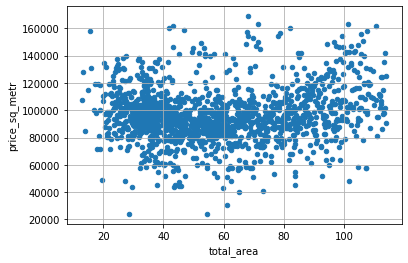

In [55]:
# построим диаграмму и изучим зависимость площади и стоимости квартир:
df \
    .pivot_table(index='total_area', values='price_sq_metr') \
    .reset_index() \
    .plot(x='total_area', y='price_sq_metr', kind='scatter', grid=True)

In [56]:
#посчитаем кофф корреляции:
df['total_area'].corr(df['price_sq_metr'])

0.01913042456646681

Коэффициент корреляции близок к 0, можно сказать , что связи нет между площадью квартир и стоимостью квартир.

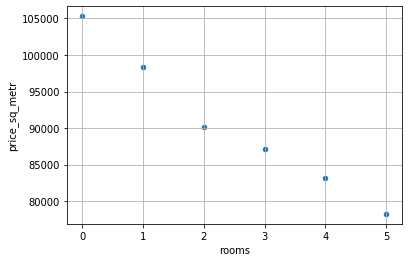

In [57]:
# построим диаграмму и изучим зависимость кол-ва комнат и стоимости квартир:
df \
    .pivot_table(index='rooms', values='price_sq_metr') \
    .reset_index() \
    .plot(x='rooms', y='price_sq_metr', kind='scatter', grid=True)

In [58]:
#посчитаем кофф корреляции:
df['rooms'].corr(df['price_sq_metr'])

-0.17555445880084447

Отрицательный Коэффициент корреляции, связь есть, но не такая сильная.
Хотя по графику видим четкую отрицательную взаимосвязь, с увиличением колич-ва комнат стоимость квартир снижается. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Наверное всё же не квартир, а квадратного метра. Может быть сосвсем многокомнатные квартиры кроме своей площади имеют определенные элитные атрибуты, более дорогой ремонт, элитный жк.</div>


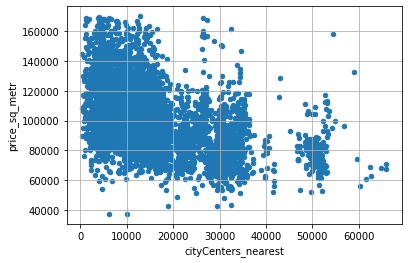

In [59]:
# построим диаграмму и изучим зависимость удалённости от центра и стоимости квартир:
df \
    .pivot_table(index='cityCenters_nearest', values='price_sq_metr') \
    .reset_index() \
    .plot(x='cityCenters_nearest', y='price_sq_metr',kind='scatter', grid=True)

In [60]:
#посчитаем кофф корреляции:
df['cityCenters_nearest'].corr(df['price_sq_metr'])

-0.398862633801528

Также имеем отрицательный Коэффициент корреляции, связь есть, но не такая сильная.
Судя по графику, стоимость квартир снижается, если квартира расположена дальше от центра города.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


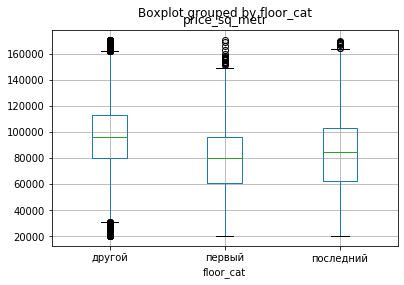

In [61]:
# построим диаграмму и изучим зависимость этажности квартир и стоимости квартир:
df.boxplot('price_sq_metr', by='floor_cat');

In [62]:
#посмотрим есть ли зависимость между этажностью квартиры и стоимостью квартиры:
pivot_table_floor_cat=df.pivot_table(index='floor_cat', values='price_sq_metr', aggfunc='mean')

pivot_table_floor_cat.sort_values('price_sq_metr', ascending=False)

,price_sq_metr
floor_cat,
другой,96227.553721
последний,83718.150199
первый,78852.760297



Судя по графику, действительно, стоимость квартир ниже, если квартира расположена на первых этажах и на последних.Видимо многие предпочитают покупать квартиры , где то посередине.


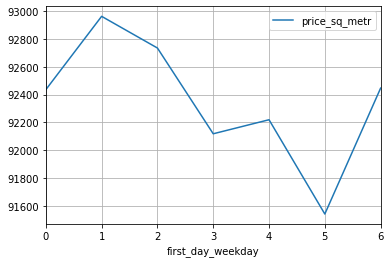

In [63]:
# построим диаграмму и изучим зависимость дня недели продажи и стоимости квартир:
df \
    .pivot_table(index='first_day_weekday', values='price_sq_metr') \
    .reset_index() \
    .plot(x='first_day_weekday', y='price_sq_metr', grid=True)

In [64]:
#посчитаем кофф корреляции:
df['first_day_weekday'].corr(df['price_sq_metr'])

-0.008466954979164082

Согласно коэфф Пирсона, Связи практически нет между днем недели продаж и стоимостью квартир.

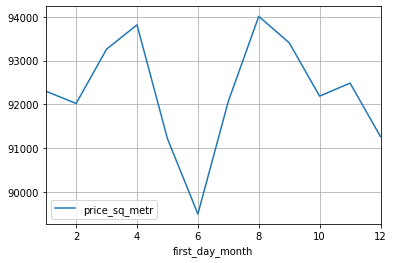

In [65]:
# построим диаграмму и изучим зависимость месяца продажи и стоимости квартир:
df \
    .pivot_table(index='first_day_month', values='price_sq_metr') \
    .reset_index() \
    .plot(x='first_day_month', y='price_sq_metr', grid=True)

In [66]:
#посчитаем кофф корреляции:
df['first_day_month'].corr(df['price_sq_metr'])

-0.0033580851317720926

Согласно коэфф Пирсона, Связи практически нет между месяцем продаж и стоимостью квартир.

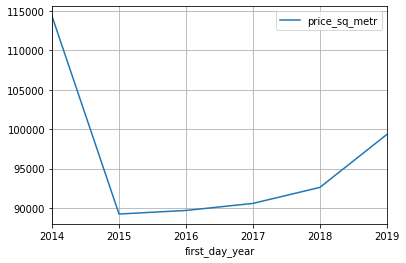

In [67]:
# построим диаграмму и изучим зависимость года продаж и стоимости квартир:
df \
    .pivot_table(index='first_day_year', values='price_sq_metr') \
    .reset_index() \
    .plot(x='first_day_year', y='price_sq_metr', grid=True)

In [68]:
#посчитаем кофф корреляции:
df['first_day_year'].corr(df['price_sq_metr'])

0.08719676834607201

Наблюдаются определенные закономерности в зависимости стоимости квартиры от временных характеристик, так летом случается некое падение по цене, наверное оно стремится за предложениями. ЧТо касается годов, есть предположение, что цена на квартиры связана с состоянием экономики страны)

Согласно коэфф Пирсона, Связи есть между годом продаж  и стоимостью квартир, но очень незначительная. Согласно графику, с 2015 г цены на квартиры повышаются

In [69]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений.

top_10_locality_name=df \
    .groupby(['locality_name']) \
    .agg({'rooms':'count'}) \
    .rename(columns={'rooms':'count'}) \
    .sort_values('count',ascending=False) \
    .head(10)
top_10_locality_name

,count
locality_name,
Санкт-Петербург,12250
посёлок Мурино,487
посёлок Шушары,415
Всеволожск,359
посёлок Парголово,312
Колпино,312
Пушкин,308
Гатчина,273
деревня Кудрово,267


In [70]:
#Посчитаем среднюю цену квадратного метра в этих населённых пунктах:
mean_price_top_locality_name=df[df['locality_name'].isin(top_10_locality_name.index)]['price_sq_metr'].mean().round(2)
print('Cредняя стоимость квадратного метра в топ-10 населенных пунтах: {:2}'. format(mean_price_top_locality_name))

Cредняя стоимость квадратного метра в топ-10 населенных пунтах: 100714.64


In [71]:
#Выделим населённые пункты с самой высокой стоимостью жилья:
high_price=df.query('price_sq_metr==price_sq_metr.max()')['locality_name']
high_price

23319    Санкт-Петербург
Name: locality_name, dtype: object

In [72]:
#Выделим населённые пункты с самой низкой стоимостью жилья:
low_price=df.query('price_sq_metr==price_sq_metr.min()')['locality_name']
low_price

18779    Сланцы
Name: locality_name, dtype: object

In [73]:
df.query('price_sq_metr==price_sq_metr.min()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_ratio,kitchen_ratio,too_large_area,too_expensive_price,too_chip_price,too_many_rooms,too_high_ceiling_height,too_low_ceiling_height,too_slow,too_fast
18779,11,1050000.0,52.0,2017-06-12,2,2.5,5.0,32.0,1,False,...,0.615385,0.153846,False,False,False,False,False,False,False,False


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


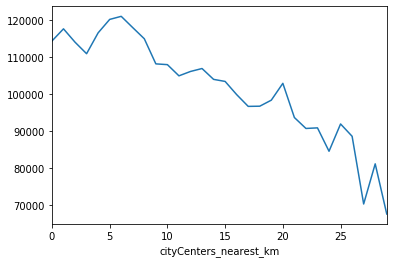

In [74]:
#сделаем срез только по объявлениям Санкт-Петербурга:
data_spb=df.query('locality_name=="Санкт-Петербург"')
#Создадим  столбец с расстоянием до центра в километрах:
data_spb['cityCenters_nearest_km']=round(data_spb['cityCenters_nearest']/1000)
#Посчитаем среднюю стоимость на каждый км и построим линейный график:
data_spb \
    .groupby('cityCenters_nearest_km')['price_sq_metr'] \
    .mean() \
    .plot()

In [75]:
#посчитаем кофф корреляции:
data_spb['cityCenters_nearest_km'].corr(data_spb['price_sq_metr'])

-0.28779375405681246

Судя по коэфф корреляции и графику взамосвязь между ценой и  удалённости от центра есть. Связь отрицательная, чем дальше квартиры о  центра тем стоимость квартиры снижается.Центральной зоной можно считать до 7 км, после , как видно по графику стоимость снижается линейно. 

In [76]:
#Выделим сегмент квартир в центре:
cityCenters_nearest_segment = data_spb[(data_spb['cityCenters_nearest_km'] <= 7) & (data_spb['locality_name'] == 'Санкт-Петербург')]
cityCenters_nearest_segment.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_ratio,too_large_area,too_expensive_price,too_chip_price,too_many_rooms,too_high_ceiling_height,too_low_ceiling_height,too_slow,too_fast,cityCenters_nearest_km
24,8,6500000.0,97.2,2015-10-31,2,2.80,3.0,46.50,1,NaN,...,0.201646,False,False,False,False,False,False,False,False,2.0
94,3,3500000.0,29.5,2019-04-26,1,2.50,5.0,15.60,2,NaN,...,0.186441,False,False,False,False,False,False,False,False,7.0
99,32,9600000.0,90.0,2017-09-26,4,2.55,5.0,67.00,2,NaN,...,0.088889,False,False,False,False,False,False,False,False,3.0
111,4,4590000.0,40.0,2017-05-29,1,3.00,6.0,18.00,1,NaN,...,0.250000,False,False,False,False,False,False,False,False,6.0
137,11,13310800.0,85.1,2018-01-01,2,2.70,10.0,31.52,5,NaN,...,0.315511,False,False,False,False,False,False,False,False,4.0
138,8,4800000.0,40.0,2017-11-18,2,2.80,3.0,29.00,2,NaN,...,0.150000,False,False,False,False,False,False,False,False,3.0
143,9,2990000.0,30.0,2016-06-08,1,2.50,9.0,20.00,9,NaN,...,0.186667,False,False,False,False,False,False,False,False,6.0
159,14,7050000.0,66.0,2017-09-04,3,3.00,4.0,37.80,4,False,...,0.166667,False,False,False,False,False,False,False,False,5.0
181,2,7900000.0,71.8,2017-08-23,3,3.00,5.0,38.70,1,NaN,...,0.167131,False,False,False,False,False,False,False,False,3.0
206,16,5080000.0,31.3,2019-04-23,1,2.50,7.0,16.00,4,False,...,0.242812,False,False,False,False,False,False,False,False,7.0


Допустимая граница, посмотрим, чем отличаются квартиры в центре

Проанализируем квартиры  в центре и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
Построим диаграммы размаха  для каждого параметра total_area, price_sq_metr,rooms,ceiling_height. 

count    1539.000000
mean       65.980058
std        21.828346
min        13.200000
25%        48.000000
50%        64.800000
75%        83.000000
max       114.000000
Name: total_area, dtype: float64

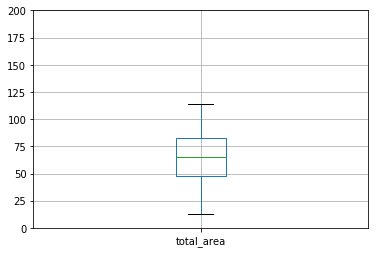

In [77]:
cityCenters_nearest_segment.boxplot('total_area') 
plt.ylim(0, 200)
cityCenters_nearest_segment['total_area'].describe()

count      1539.000000
mean     117965.219381
std       24686.865508
min       26250.000000
25%       99282.038085
50%      116391.852570
75%      137110.754414
max      170312.500000
Name: price_sq_metr, dtype: float64

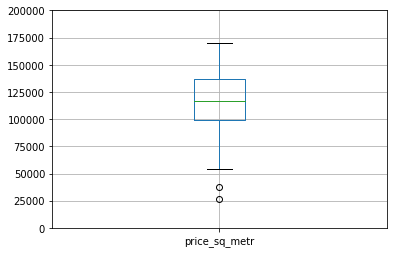

In [78]:
cityCenters_nearest_segment.boxplot('price_sq_metr') 
plt.ylim(0,200000)
cityCenters_nearest_segment['price_sq_metr'].describe()

count    1539.000000
mean        2.307342
std         0.936066
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

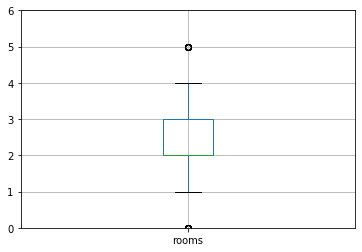

In [79]:
cityCenters_nearest_segment.boxplot('rooms') 
plt.ylim(0, 6)
cityCenters_nearest_segment['rooms'].describe()

В отличии от всего города, в центре в среднем квартры с площадью 65 кв.м -2-х комнатные квартиры.В центре города квартиры с потолками 2.77, что немного выше , нежеле во всем городе -2.73 см. Средняя цена в центре города за 1 кв.м так же отличается, она выше на 22 % -118021 руб.

count    1539.000000
mean        2.774237
std         0.185091
min         2.400000
25%         2.600000
50%         2.750000
75%         3.000000
max         3.050000
Name: ceiling_height, dtype: float64

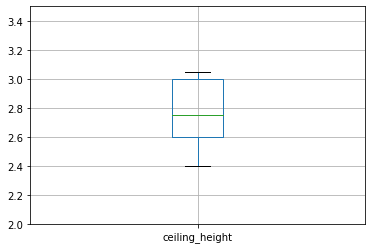

In [80]:
cityCenters_nearest_segment.boxplot('ceiling_height') 
plt.ylim(2, 3.5)
cityCenters_nearest_segment['ceiling_height'].describe()

Средняя квартира на продажу,  в центре Санкт-Петербурга это 2-комнатная квартира площадь- 65 кв. м , потолки - 2.77 м, цена за 1 кв.м 118 021 рублей.

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

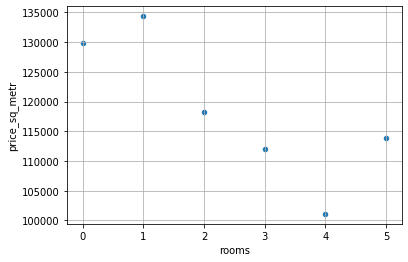

In [81]:
cityCenters_nearest_segment \
    .pivot_table(index='rooms', values='price_sq_metr') \
    .reset_index() \
    .plot(x='rooms', y='price_sq_metr', kind='scatter', grid=True)

In [82]:
cityCenters_nearest_segment.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,kitchen_ratio,too_large_area,too_expensive_price,too_chip_price,too_many_rooms,too_high_ceiling_height,too_low_ceiling_height,too_slow,too_fast,cityCenters_nearest_km
total_images,1.000000,0.093524,0.025972,0.045003,0.048474,-0.038864,0.034208,0.005668,-0.028985,-0.026148,...,-0.009631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013581
last_price,0.093524,1.000000,0.793065,0.493862,0.096888,0.153799,0.611488,0.189217,-0.086473,-0.067817,...,-0.216889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.128660
total_area,0.025972,0.793065,1.000000,0.773303,0.156478,-0.025914,0.872217,0.032382,-0.102378,-0.076099,...,-0.436751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.196251
rooms,0.045003,0.493862,0.773303,1.000000,0.143642,-0.202862,0.843596,-0.093638,-0.168583,-0.084956,...,-0.572849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.186677
ceiling_height,0.048474,0.096888,0.156478,0.143642,1.000000,-0.218232,0.153722,-0.158019,0.002740,0.014005,...,-0.027176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.183678
floors_total,-0.038864,0.153799,-0.025914,-0.202862,-0.218232,1.000000,-0.166804,0.651878,0.011411,0.003505,...,0.185925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354922
living_area,0.034208,0.611488,0.872217,0.843596,0.153722,-0.166804,1.000000,-0.056734,-0.046298,-0.042752,...,-0.572962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.198453
floor,0.005668,0.189217,0.032382,-0.093638,-0.158019,0.651878,-0.056734,1.000000,-0.014273,-0.016347,...,0.055258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.248542
studio,-0.028985,-0.086473,-0.102378,-0.168583,0.002740,0.011411,-0.046298,-0.014273,1.000000,-0.003690,...,0.160775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036279
open_plan,-0.026148,-0.067817,-0.076099,-0.084956,0.014005,0.003505,-0.042752,-0.016347,-0.003690,1.000000,...,0.138785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018106


In [83]:
#посчитаем кофф корреляции:
cityCenters_nearest_segment['rooms'].corr(cityCenters_nearest_segment['price_sq_metr'])

-0.3668807531784395


Отрицательный Коэффициент корреляции. Цена за 1 кв. м за 5-комнатные квартиры выше , чем за 3-х и4-х комнатные квартиры. Скорее всего это зависит от спроса платежеспособног населения, которым хочется более просторную квартиру.

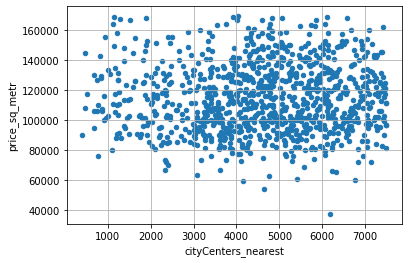

In [84]:
cityCenters_nearest_segment \
    .pivot_table(index='cityCenters_nearest', values='price_sq_metr') \
    .reset_index() \
    .plot(x='cityCenters_nearest', y='price_sq_metr',kind='scatter', grid=True)

In [85]:
#посчитаем кофф корреляции:
cityCenters_nearest_segment['cityCenters_nearest'].corr(cityCenters_nearest_segment['price_sq_metr'])

0.08542030106654638

Положительный Коэффициент корреляции, связь незначительная.Мало объявлений в центре города меньше 7 км. Или же в центре влияние близости к нему не так влияет, как по всем данным

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


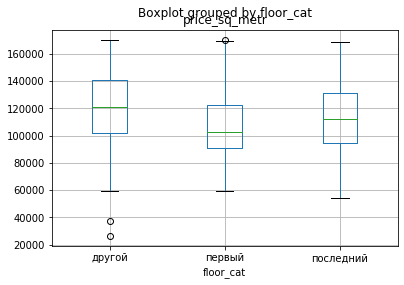

In [86]:
# построим диаграмму и изучим зависимость этажности квартир и стоимости квартир:
cityCenters_nearest_segment.boxplot('price_sq_metr', by='floor_cat')

In [87]:
#посмотрим есть ли зависимость между этажностью квартиры и стоимостью квартиры:
pivot_table_floor_cat=cityCenters_nearest_segment.pivot_table(index='floor_cat', values='price_sq_metr', aggfunc='mean').round(2)
pivot_table_floor_cat.sort_values('price_sq_metr')

,price_sq_metr
floor_cat,
первый,107263.20
последний,113959.09
другой,121225.87


Стоимость квартир ниже, если квартира расположена на первых этажах и на последних.

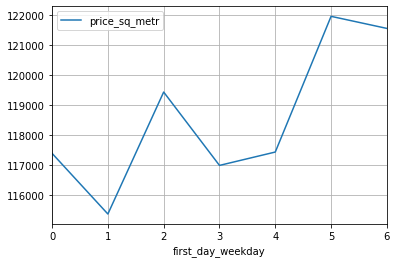

In [88]:
# построим диаграмму и изучим зависимость дня недели продажи и стоимости квартир:
cityCenters_nearest_segment \
    .pivot_table(index='first_day_weekday', values='price_sq_metr') \
    .reset_index() \
    .plot(x='first_day_weekday', y='price_sq_metr', grid=True)

In [89]:
#посчитаем кофф корреляции:
cityCenters_nearest_segment['first_day_weekday'].corr(cityCenters_nearest_segment['price_sq_metr'])

0.049006471193430046

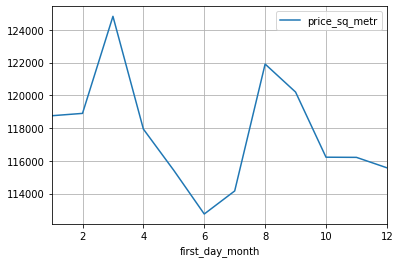

In [90]:
# построим диаграмму и изучим зависимость месяца продажи и стоимости квартир:
cityCenters_nearest_segment \
    .pivot_table(index='first_day_month', values='price_sq_metr') \
    .reset_index() \
    .plot(x='first_day_month', y='price_sq_metr', grid=True)

In [91]:
#посчитаем кофф корреляции:
cityCenters_nearest_segment['first_day_month'].corr(cityCenters_nearest_segment['price_sq_metr'])

-0.04874523008289847

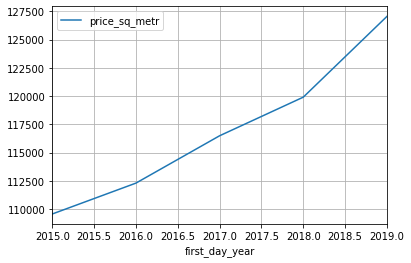

In [92]:
# построим диаграмму и изучим зависимость года продаж и стоимости квартир:
cityCenters_nearest_segment \
    .pivot_table(index='first_day_year', values='price_sq_metr') \
    .reset_index() \
    .plot(x='first_day_year', y='price_sq_metr', grid=True)

In [93]:
#посчитаем кофф корреляции:
cityCenters_nearest_segment['first_day_year'].corr(cityCenters_nearest_segment['price_sq_metr'])

0.16196316669322416

Стоимость на квартиры по выходным становятся выше, видимо многие смотрят и покупают именно на выходных. 

В марте цены подскочили на квартиры, с 2015  г имеем линейный рост стоимости на квартиры.


## Общий вывод

Изначальная цель проекта была:

Научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

В ходе работы были найдены пропуски в данных. Заменили пропуски в столбце `balcony` на 0.
Пропуски в столбце `ceiling_height` заменили медианным значением по группировке этажности дома.Также в столбцах `living_area,kitchen_area` пропущенные значения заполнили медианным значением группируя по кол-ву комнат.Пропущенные знаечения в столбцах `floors_total,locality_name`  удалили.
Пропущенные значения в столбцах `is_apartment,airports_nearest, cityCenters_nearest,parks_around3000  parks_nearest,ponds_around3000 ,ponds_nearest` оставим без изменений, так как они нам не нужны при работе с данными.
Пропущенные значения в столбцах `days_exposition` оставим без изменений, так как возможно объявление еще актуально и поэтому пропущенное значение в таблице.
В данных также были обнаружены аномальные значения в столбцах площадь квартиры, стоимость квартиры, кол-во комнат, высота потолков и срок продажи квартир. Выбросы, не попадающие в нормальные границы значений, из таблицы были удалены, что составляет 18 % от всех данных.

Площадь минимальная  площадь 17 кв.м максимальная-114 км, все что больше уже аномальные значения.
Число комнат в среднем предобладают объявления 2-х комнатных квартир, но цены выше на однокомнатные.
Так же стоимость квартиры выше, чем ближе к центру и выше первого этажа  она находится. Средние потолки это 2,75 м. 

Срок продажи квартир в среднем 3 месяца, слишком быстрые продажи 1 день и долгие продажи 510 дней, подозрительны.